***This chapter covers***

1. Expressing real-world problems as mathematical functions
2. Understanding the building blocks of a neural network
3. Approximating functions via neural networks

###7.1 Neural networks: A 10,000-foot view

How can we make a neural network model/approximate/express a specific target function corresponding to a particular problem of interest? Answer: we can adjust the following two aspects of the neural network:

1. Architecture—The number of neurons and the connections between them

2. Parameter values—The weights of the connection between neurons

### 7.2 Expressing real-world problems: Target functions

Numeric quantities can occur in two distinct forms: **continuous and categorical**.
1. **Continuous variables** can take any of the infinitely many real number values in a given range.
  - For instance, the stock price in our “to sell or not sell a stock” problem can take any value greater than zero.
2. **Categorical variables** can take one of a finite set of allowed values, where the value represents a category. A special categorical case is a binary variable, where there are only two categories.
  - For instance, expert advice in our stock-selling problem can take only two values: 0 or 1, corresponding to the two categories of advice, “do not sell” and “sell,” respectively.

#### 7.2.1 Logical functions in real-world problems

- Logical AND—We also exemplify this in terms of the cat brain. Imagine a slightly less timid cat that runs away from things that are both hard and sharp. But it is not scared by hardness and sharpness alone. Its brain can be modeled by the system of machines shown in figure
- Logical NOT—Consider a machine that sounds an alarm if it sees any unauthorized person in a restricted access area. Let’s assume that we also have a separate machine: a face detector that can recognize the faces of all authorized personnel. It emits a binary decision 1 (recognized face) or 0 (unrecognized face). The overall system takes the output of the face detector and performs a logical NOT operationon it.
- Multi-input logical OR—Imagine a machine that decides whether a self-driving car needs to brake. Assume that three separate detectors emit 1 if a person, vehicle, or bend in the road, respectively, is seen in front of the car. A brake must be applied if any of these separate detectors emits a 1. This is shown in figure 7.3.
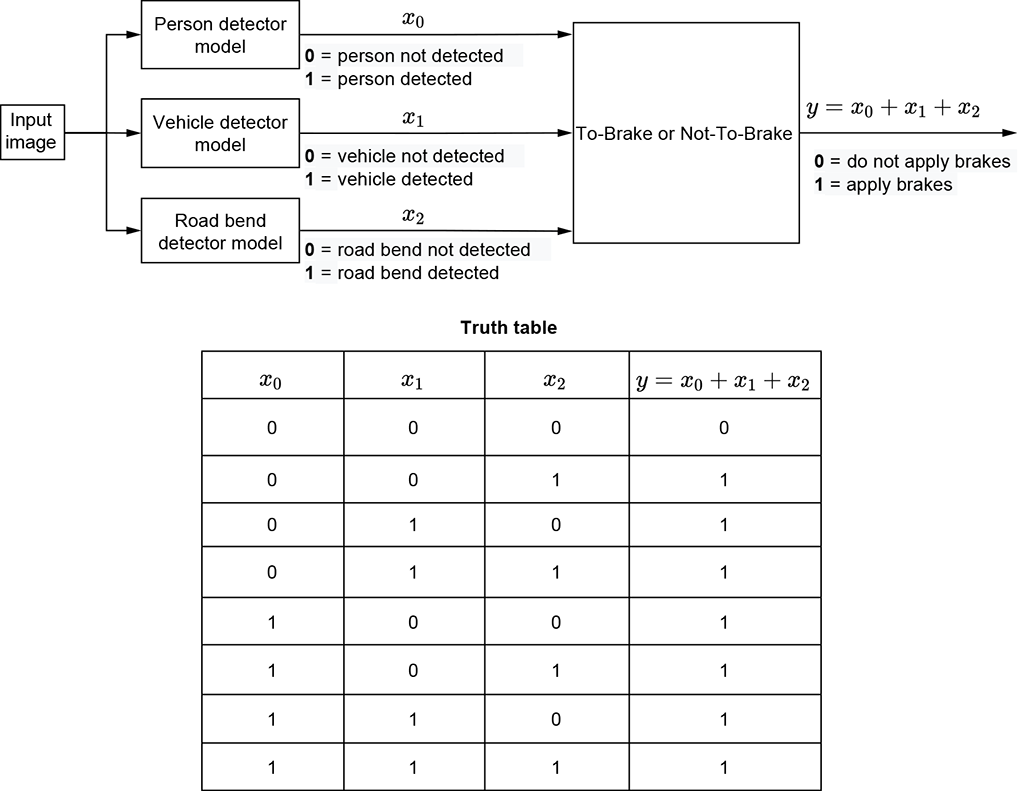

- Multi-input logical AND—Consider a machine that helps a venture capitalist decide whether to invest in a startup. Assume that three separate machines emit 1 when the following conditions are met: *(1) the CEO has a track record of success*, *(2) the product elicits interest from targeted customers*, and *(3) the product is sufficiently novel*, respectively. The machine will decide to invest if all three separate machines emit 1. Thus, the machine outputs 1 when condition (1) is met AND condition (2) is met AND condition (3) is met. This is an example of a three-input AND.
- Logical XOR—Suppose we are building a social media site. Assume we have a separate detector that, for any person, emits 1 if they like rock music and 0 otherwise. Using this information about two people, the problem is to decide whether they should be recommended as friends to each other. Friendship potential is high if they both like rock music or both dislike it. But if one person likes rock and the other dislikes it, they will probably not be good friends. Thus condition 1 is high rock-music affinity for person 1, and condition 2 is high rock-music affinity for person 2. The exclusive OR of the two conditions is 1 when one is true but the other is not. This machine outputs 1 if the NOT of the exclusive OR is true, meaning neither person likes rock music or both people like rock music. Figure 7.4 depicts this.

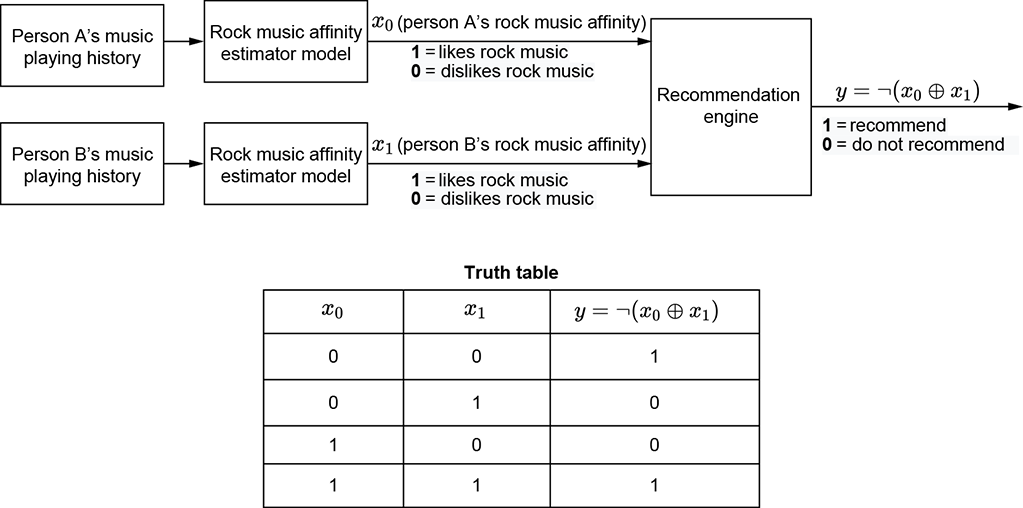


- m-out-of-n trigger—Imagine we are trying to create a face detector. We have already created separate part detectors for noses, eyes, lips, and ears. If we detect, say, any two of these together, we feel confident enough to declare a face. In computer vision, we often have a problem called occlusion, where an important object becomes invisible to the camera because another object blocks the camera’s line of sight. Computer vision algorithms always try to be robust against occlusion, meaning they want to emit the right output even when occlusion occurs. This is why we do not want to mandate a positive signal from all the part detectors; we want to detect the face even when a few of the parts are occluded. Hence, our machine emits 1 when, say, two of the n parts (such as eyes and lips) are detected.
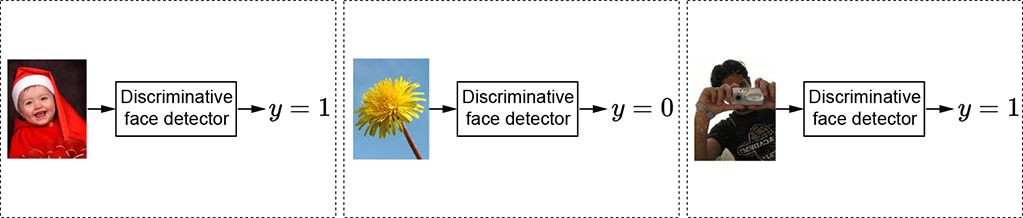
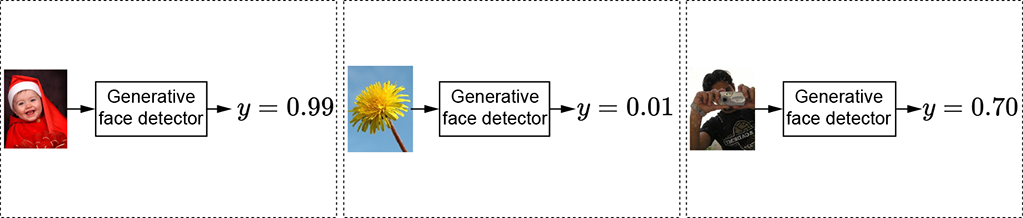

### 7.2.2 Classifier functions in real-world problems

Geometrically, each scalar input variable forms a separate dimension in the input space. **All possible combinations of these scalar input variables together form a multidimensional space called the input space (or feature space)**. Each specific combination of input values is a point (represented by the input vector ) in this space.

The solid curve separates the threat and not-threat regions. Such curves that separate regions in input space belonging to different classes are known as decision boundaries. Estimating the decision boundary is effectively the same as building the classifier.
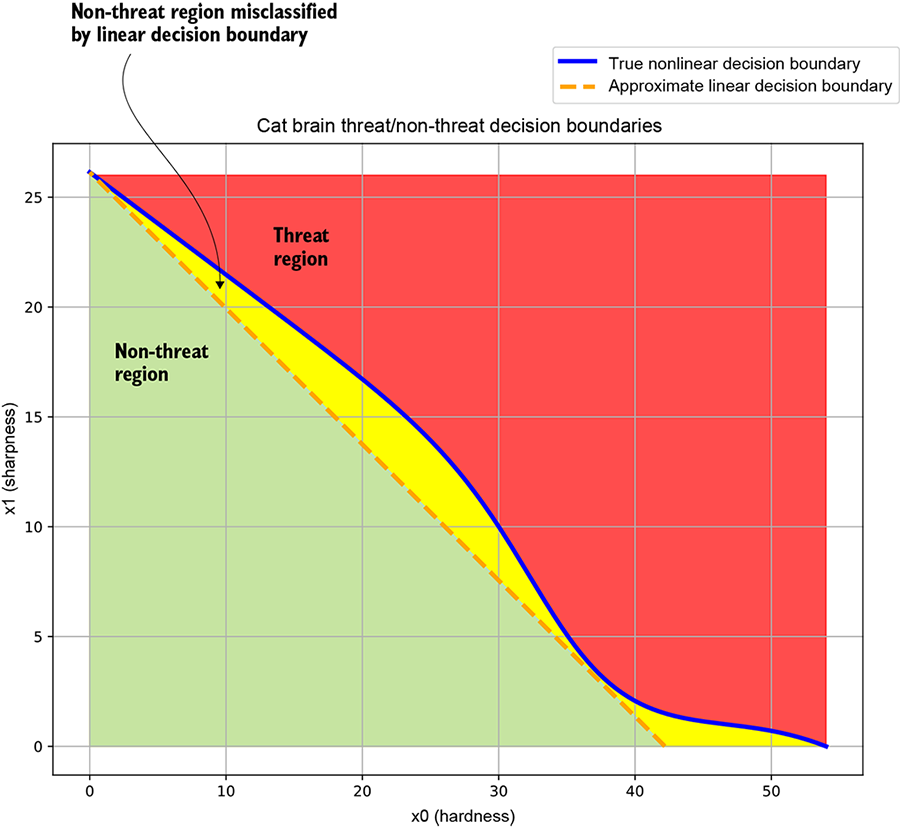

Most real-life input spaces have hundreds or even thousands of dimensions. The idea of a decision boundary as a hypersurface continues to hold in higher dimensions. For higher-dimensional input spaces, hyperplanes function as linear separators. In simpler problems with higher-dimensional input spaces, such linear separators suffice. In more complicated cases, we can have other curved hypersurfaces as nonlinear separators. We may not be able to visualize hyperspaces in our head, but we can form mental pictures with 3D analogs. Figure 7.5 shows some planar decision boundaries in 3D input space.

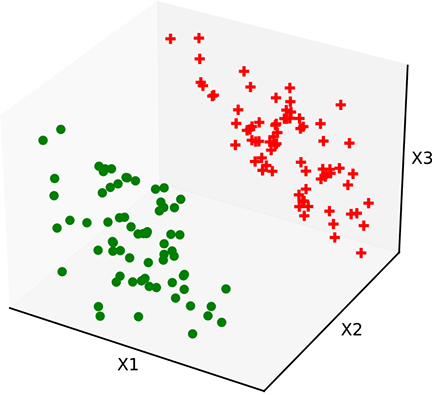

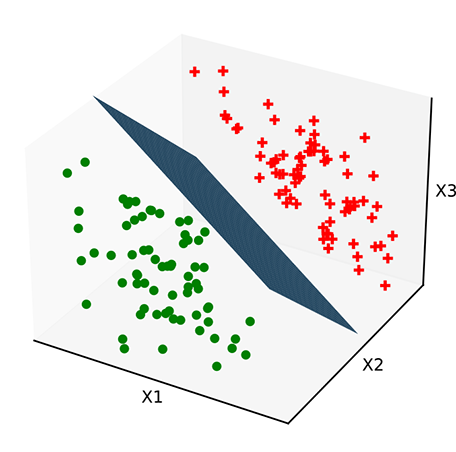

(d) Optimal decision boundary. The plane has correct , b. Properly trained.

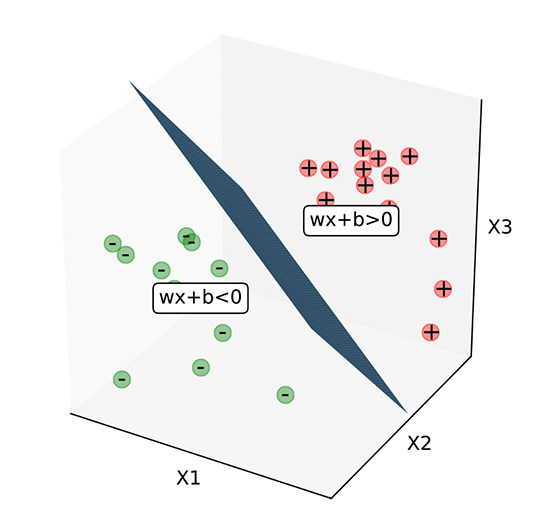

### 7.2.3 General functions in real-world problems

There are problems where a categorical output variable will not do and a continuous output variable is called for: for instance, estimating the speed at which a self-driving vehicle should run. Using inputs like the speed limit for the road being traversed, speeds of neighboring vehicles, and so on, we need to estimate how fast the self-driving vehicle should go.

Another noteworthy situation where the output needs to be a continuous rather than a categorical variable is when we are modeling the probability of some event occurring. For instance, let’s again consider the face detector. Given an image as input, the face classification function emits 0 to indicate not a face and 1 to indicate face. Such functions are called discriminative. We could also have a function that outputs the probability of the image containing a face. Such functions are called generative

## 7.3 The basic building block or neuron: The perceptron


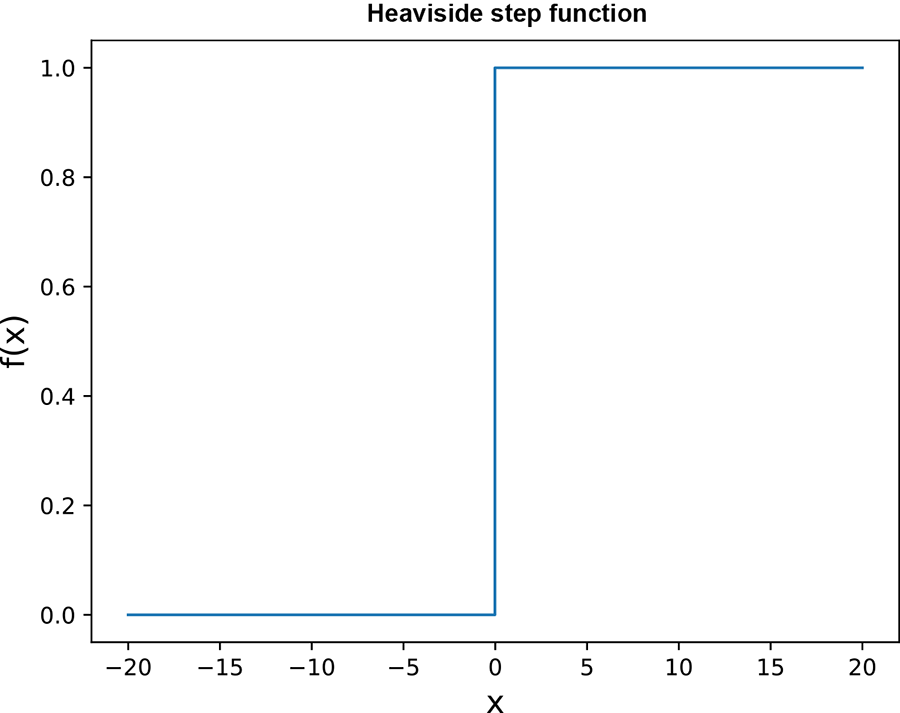

### 7.3.2 Hyperplanes

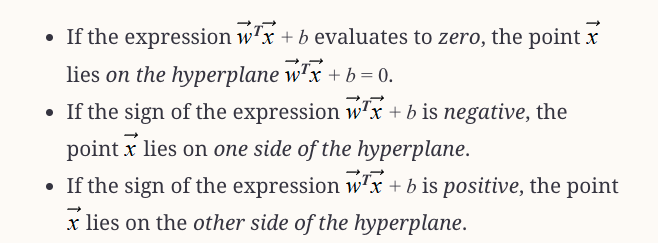

### 7.3.3 Perceptrons and classification


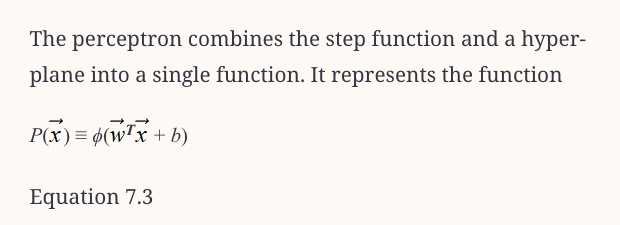

the perceptron function maps all points on one side of the (w, b) plane to zero and all points on the other side of the same plane to 1. In other words, it performs as a linear classifier, with the (w, b) plane as the decision boundary.

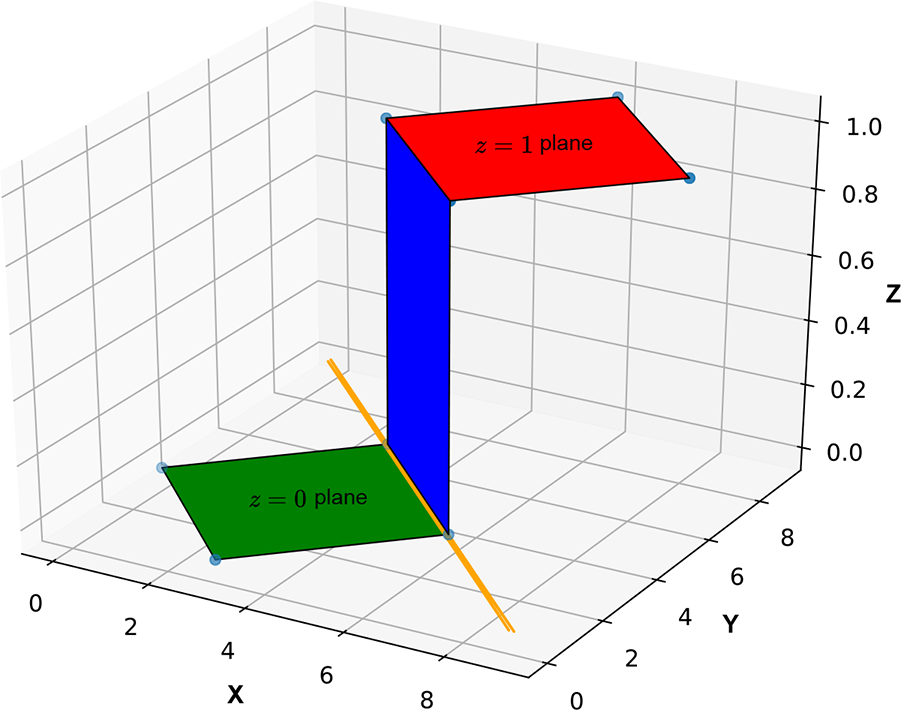

In [4]:
import torch

def fully_connected_layer(X, W, b, activation=None):
  """
  Implements a Fully Connected layer of Neural Networks
  Input:
  1) X: n x d tensor - each row of X is an input vector, there are n vectors
          each of size d.
  2) W: m x d tensor
  Returns:
  y: m tensor, y = W X.transpose + b
  """
  assert (activation is None or activation is torch.sigmoid or activation is torch.relu
          or activation is torch.tanh or activation is torch.heaviside)
  assert torch.is_tensor(X) and torch.is_tensor(W) and torch.is_tensor(b)
  assert len(X.shape) == 2

  n = X.shape[0] # number of input vectors
  d = X.shape[1] # input dimensionality
  m = b.shape[0] # output dimensionality

  assert b.shape == torch.Size([m]), "b.shape = {}".format(b.shape)
  assert W.shape == torch.Size([m, d]), "W.shape = {}".format(W.shape)

  # Adds a column of 1s. X ↦ n × (d+1) tensor.
  X = torch.cat((X, torch.ones([X.shape[0], 1], dtype=torch.float32)), dim=1)
  W = torch.cat((W, b.unsqueeze(dim=1)), dim=1)
  y = torch.matmul(W, X.transpose(0, 1))

  if activation is not None:
    if activation is torch.heaviside:
      y = activation(y, torch.tensor(1.0))
    else:
      y = activation(y)

  return y.transpose(0, 1)


def Perceptron(X, W, b, activation=torch.heaviside):
  assert W.shape[0] == 1 and b.shape[0] == 1
  return fully_connected_layer(X, W, b, activation=activation)


def MLP(X, W0, W1, b0, b1, activation0=torch.heaviside, activation1=None):
  y0 = fully_connected_layer(X=X, W=W0, b=b0, activation=activation0)
  return fully_connected_layer(X=y0, W=W1, b=b1, activation=activation1)

① X : n × d tensor; each row is an input vector of size d. w : m × d tensor.

② Adds a column of 1s. X ↦ n × (d+1) tensor.

③ Combines weights and biases

④ Matrix multiplication of X and W

⑤ Applies the Heaviside step function

⑥ A single perceptron

### 7.2 Modeling logical gates using perceptrons

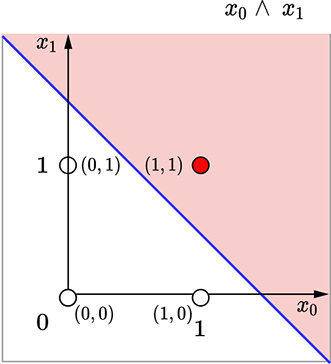

(a) Logical AND decision boundary: x0 + x1 = 1.5

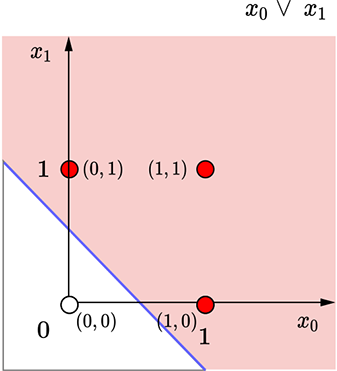

(b) Logical OR decision boundary: x0 + x1 = 0.5


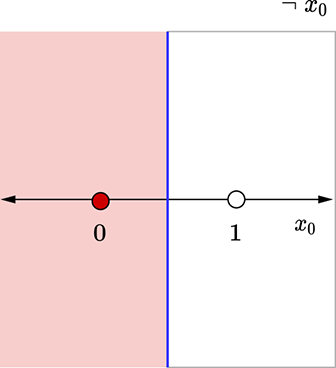

(c) Logical NOT decision boundary: x0 = 0.5



In [5]:
# Logical AND
X = torch.tensor([[0., 0.],
                 [0., 1.],
                 [1., 0.],
                 [1., 1.]], dtype=torch.float32)
W = torch.tensor([[1.0, 1.0]], dtype=torch.float32)
b = torch.tensor([-1.5])
Y = Perceptron(X=X, W=W, b=b, activation=torch.heaviside)
print('x  |  y  |  x AND y')
print('--------------------')
for x, y in zip(X, Y):
  print('{}  |  {}  |    {}'.format(int(x[0]), int(x[1]), int(y[0])))

x  |  y  |  x AND y
--------------------
0  |  0  |    0
0  |  1  |    0
1  |  0  |    0
1  |  1  |    1


In [7]:
# Logical OR
X = torch.tensor([[0., 0.],
                 [0., 1.],
                 [1., 0.],
                 [1., 1.]], dtype=torch.float32)
W = torch.tensor([[1.0, 1.0]], dtype=torch.float32)
b = torch.tensor([-0.5])
Y = Perceptron(X=X, W=W, b=b, activation=torch.heaviside)
print('x  |  y  |  x OR y')
print('--------------------')
for x, y in zip(X, Y):
  print('{}  |  {}  |     {}'.format(int(x[0]), int(x[1]), int(y[0])))

x  |  y  |  x OR y
--------------------
0  |  0  |     0
0  |  1  |     1
1  |  0  |     1
1  |  1  |     1


In [8]:
# Logical NOT
X = torch.tensor([[0],
                 [1.]
                 ], dtype=torch.float32)
W = torch.tensor([[-1.0]], dtype=torch.float32)
b = torch.tensor([0.5])
Y = Perceptron(X=X, W=W, b=b, activation=torch.heaviside)
print('x  |  NOT x')
print('-----------')
for x, y in zip(X, Y):
  print('{}  |  {}'.format(int(x[0]), int(y[0])))

x  |  NOT x
-----------
0  |  1
1  |  0


In [9]:
# Logical XOR
X = torch.tensor([[0., 0.],
                 [0., 1.],
                 [1., 0.],
                 [1., 1.]], dtype=torch.float32)
W0 = torch.tensor([[1.0, -1.0],
                  [-1.0, 1.0]], dtype=torch.float32)
b0 = torch.tensor([-0.5, -0.5])
W1 = torch.tensor([[1.0, 1.0]], dtype=torch.float32)
b1 = torch.tensor([-0.5])

Y = MLP(X=X, W0=W0, W1=W1, b0=b0, b1=b1,
        activation0=torch.heaviside, activation1=torch.heaviside)
print('x  |  y  |  x OR y')
print('--------------------')
for x, y in zip(X, Y):
  print('{}  |  {}  |     {}'.format(int(x[0]), int(x[1]), int(y[0])))

x  |  y  |  x OR y
--------------------
0  |  0  |     0
0  |  1  |     1
1  |  0  |     1
1  |  1  |     0


① Input data points

② Instantiates the weights

③ Instantiates the bias

④ Output

### 7.4.3-approximating-surfaces-with-perceptrons

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter, LinearLocator

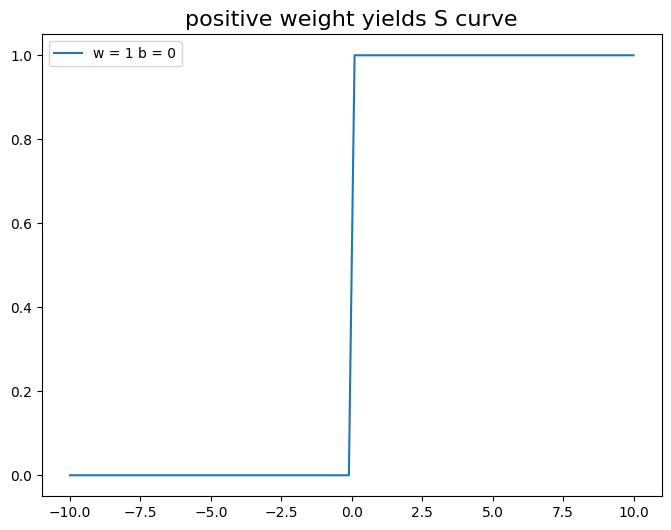

In [11]:
mpl.rcParams['legend.fontsize'] = 10
# 1D S curves - positive weight
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
x = torch.linspace(start=-10, end=10, steps=100)
w = torch.tensor([1.0], dtype=torch.float32)
b = torch.tensor([0.0])
y = Perceptron(X=x.unsqueeze(dim=1), W=w.unsqueeze(dim=1), b=b, activation=torch.heaviside)
ax.plot(x.squeeze(), y.squeeze(), label="w = 1 b = 0")
plt.title("positive weight yields S curve", fontsize=16)
ax.legend()
plt.show()
fig.show()

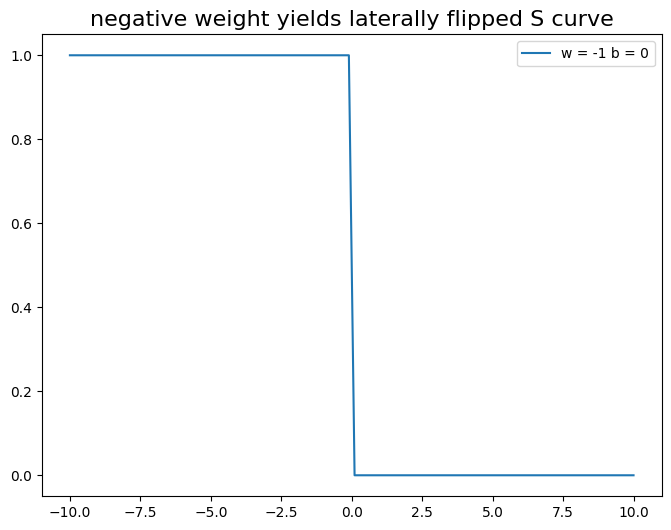

In [12]:
# 1D S curves - negative weight
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
x = torch.linspace(start=-10, end=10, steps=100)
w = torch.tensor([-1.0], dtype=torch.float32)
b = torch.tensor([0.0])
y = Perceptron(X=x.unsqueeze(dim=1), W=w.unsqueeze(dim=1), b=b, activation=torch.heaviside)
ax.plot(x.squeeze(), y.squeeze(), label="w = -1 b = 0")
plt.title("negative weight yields laterally flipped S curve", fontsize=16)
ax.legend()
plt.show()
fig.show()

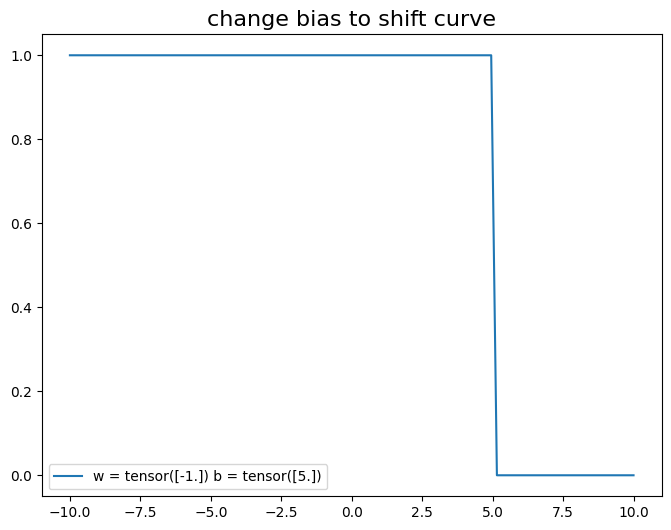

In [13]:
# 1D S curves - negative weight + shift
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
x = torch.linspace(start=-10, end=10, steps=100)
w = torch.tensor([-1.0], dtype=torch.float32)
b = torch.tensor([5.0])
y = Perceptron(X=x.unsqueeze(dim=1), W=w.unsqueeze(dim=1), b=b, activation=torch.heaviside)
ax.plot(x.squeeze(), y.squeeze(), label="w = {} b = {}".format(w, b))
plt.title("change bias to shift curve", fontsize=16)
ax.legend()
plt.show()
fig.show()

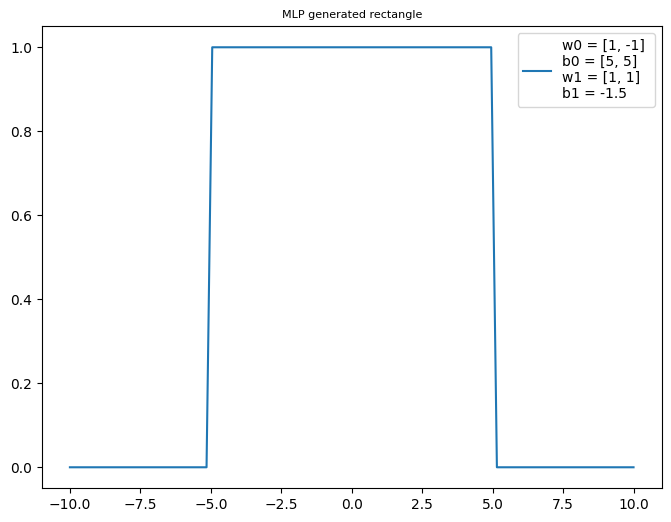

In [14]:
# 1D towers (cybenko) - various W0
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
x = torch.linspace(start=-10, end=10, steps=100)
W0 = torch.tensor([[1.0],
                   [-1.0]], dtype=torch.float32)
b0 = torch.tensor([5.0, 5.0])
W1 = torch.tensor([[1.0, 1.0]], dtype=torch.float32)
b1 = torch.tensor([-1.5])
y = MLP(X=x.unsqueeze(dim=1), W0=W0, W1=W1, b0=b0, b1=b1, activation0=torch.heaviside,activation1=torch.heaviside)
ax.plot(x.squeeze(), y.squeeze(),
        label="w0 = [1, -1] \nb0 = [5, 5] \nw1 = [1, 1] \nb1 = -1.5")
plt.title("MLP generated rectangle", fontsize=8)
ax.legend()
plt.show()
fig.show()

In [15]:
# 2D Step function in X-direction
X = torch.linspace(start=-1, end=1, steps=100)
Y = torch.linspace(start=-1, end=1, steps=100)
gridX, gridY = torch.meshgrid(X, Y)
W = torch.tensor([[1.0, 0.0]], dtype=torch.float32)
b = torch.tensor([0.0], dtype=torch.float32)
X = torch.tensor([(y, x) for y, x in zip(gridX.reshape(-1), gridY.reshape(-1))])
Z = Perceptron(X=X, W=W, b=b, activation=torch.heaviside)
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection="3d")
surf = ax.plot_surface(
    gridX, gridY, Z.reshape(100, -1).numpy(), cmap=cm.coolwarm,
    linewidth=0, antialiased=False
)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.zaxis.set_major_locator(LinearLocator(1))
ax.set_zlabel("$y(x0, x1)$", fontsize=20, rotation=0)
ax.set_xlabel("x0", fontsize=20)
ax.set_ylabel("x1", fontsize=20)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Step function along x0 direction')
plt.show()
fig.show()

/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 800x600 with 0 Axes>